# MLAI Week 2: Objective Functions

### Neil D. Lawrence

### 6th October 2015

In [37]:
import pods
pods.notebook.code_toggle()

### Objective Function

- Last week we motivated the importance of probability.
- This week we motivate the idea of the 'objective function'.

### Classification

-   We are given data set containing “inputs”, $\mathbf{X}$, and
    “targets”, $\mathbf{y}$.

-   Each data point consists of an input vector $\mathbf{x}_{i, :}$
    and a class label, $y_i$.

-   For binary classification assume $y_i$ is either
    $1$ (yes) or $-1$ (no).

-   Input vector can be thought of as features.

### Classification Examples

-   Classifying hand written digits from binary images (automatic zip
    code reading).

-   Detecting faces in images (e.g. digital cameras).

-   Who a detected face belongs to (e.g. Picasa).

-   Classifying type of cancer given gene expression data.

-   Categorization of document types (different types of news article on
    the internet).

In [ ]:
  importTool('ndlutil');
  importTool('drawing');
  textWidth = 13;
  randn('seed', 1e51);
  rand('seed', 1e51);
  markerSize = 16;
  markerLineWidth = 6;
  redColor = [1, 0, 0];
  greenColor = [0, 1, 0];
  blueColor = [0, 0, 1];
  magentaColor = [1, 0, 1];
  blackColor = [0, 0, 0];
  cyanColor = [0, 1, 1];
  yellowColor = [1, 1, 0];
  negative = false;
  if blackBackground
    negative = true;
    redColor = 1-redColor;
    greenColor = 1-greenColor;
    blueColor =  1-blueColor;
    magentaColor = 1-magentaColor;
    cyanColor = 1-cyanColor;
    yellowColor = 1-yellowColor;
    blackColor = 1- blackColor;
  end
  saveDir = '../../../ml/tex/diagrams/';


### The Perceptron

-   Developed in 1957 by Rosenblatt.

-   Take a data point at, $\mathbf{x}_i$.

-   Predict it belongs to a class, 
    - $y_i=1$ if $\sum_j w_{j} x_{i, j} + b  > 0$ (i.e.
    $\mathbf{w}^\top \mathbf{x}_i + b > 0$). 
    - Otherwise assume $y_i=-1$.

## Perceptron-like Algorithm

1.  Select a random data point $i$.

2.  Ensure $i$ is correctly classified by setting
    $\mathbf{w} = y_i \mathbf{x}_i$.
    -   i.e.
        $\text{sign}(\mathbf{w}^\top\mathbf{x}_{i, :}) = \text{sign}(y_i\mathbf{x}_{i, :}^\top\mathbf{x}_{i, :}) = \text{sign}(y_i) = y_i$



### Perceptron Iteration

1.  Select a misclassified point, $i$.

2.  Set
    $\mathbf{w} \leftarrow \mathbf{w} + \eta y_i \mathbf{x}_{i, :}$.

    -   If $\eta$ is large enough this will guarantee this point
        becomes correctly classified.

3.  Repeat until there are no misclassified points.

In [43]:
import pods
pods.notebook.code_toggle(False)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [17]:
# let's sample first from the positive class. To separate 
# it from the negative, we'll add 1.5 to the samples.
x_plus = np.random.normal(loc=1.5, size=(50, 2))
# And now the negative class, to separate from the positive
# we subtract 1.5 from the samples
x_minus = np.random.normal(loc=-1.5, size=(50, 2))

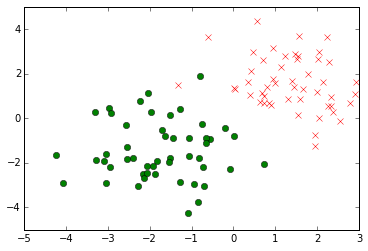

In [18]:
# now let's plot our data. We'll make the
# positive class red crosses and the negative
# class green circles
plt.plot(x_plus[:, 0], x_plus[:, 1], 'rx')
plt.plot(x_minus[:, 0], x_minus[:, 1], 'go')

In [19]:
# flip a coin (i.e. generate a random number and check if it is greater than 0.5)
choose_plus = np.random.rand(1)>0.5
if choose_plus:
    # generate a random point from the positives
    index = np.random.randint(0, x_plus.shape[1])
    w = x_plus[index, :] # set the normal vector to that point.
    b = 1
else:
    # generate a random point from the negatives
    index = np.random.randint(0, x_minus.shape[1])
    w = -x_minus[index, :] # set the normal vector to minus that point.
    b = -1

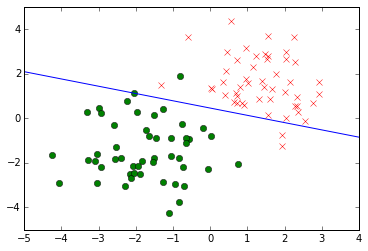

In [20]:
# Compute coordinates for the separating hyperplane
plot_limits = np.asarray([-5, 4])
if abs(w[1])>abs(w[0]):
    # If w[1]>[w[0] in absolute value, plane is likely to be leaving tops of plot.
    x0 = plot_limits
    x1 = -(b + x0*w[0])/w[1]
else:
    # otherwise plane is likely to be leaving sides of plot.
    x1 = plot_limits
    x0 = -(b + x1*w[1])/w[0]

# Plot the data again
plt.plot(x_plus[:, 0], x_plus[:, 1], 'rx')
plt.plot(x_minus[:, 0], x_minus[:, 1], 'go')
# plot a line to represent the separating 'hyperplane'
plt.plot(x0, x1, 'b-')

In [21]:
def hyperplane_coordinates(w, b, plot_limits):
    
    if abs(w[1])>abs(w[0]):
        # If w[1]>w[0] in absolute value, plane is likely to be leaving tops of plot.
        x0 = plot_limits
        x1 = -(b + x0*w[0])/w[1]
    else:
        # otherwise plane is likely to be leaving sides of plot.
        x1 = plot_limits
        x0 = -(b + x1*w[1])/w[0]
    return x0, x1

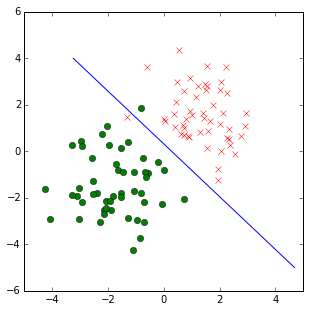

In [24]:
# import the time model to allow python to pause.
import time
# import the IPython display module to clear the output.
from IPython.display import clear_output

f, ax = plt.subplots(1,1,figsize=(5,5))
learn_rate = 0.1
num_iterations = 1000
for i in range(num_iterations):
    w_updated = False
    # select a point at random from the data
    choose_plus = np.random.uniform(size=1)>0.5
    if choose_plus:
        # choose a point from the positive data
        index = np.random.random_integers(x_plus.shape[0]-1)
        if not np.sign(np.dot(w, x_plus[index, :])+b) == 1:
            # point is currently incorrectly classified
            w = w + learn_rate*x_plus[index, :]
            b = b + learn_rate
            w_updated = True
    else:
        # choose a point from the negative data
        index = np.random.random_integers(x_minus.shape[0]-1)
        if not np.sign(np.dot(w, x_minus[index, :])+b) == -1:
            # point is currently incorrectly classified
            w = w - learn_rate*x_minus[index, :]
            b = b - learn_rate
            w_updated = True
    if w_updated or i==0: 
        # Plot the data again
        ax.clear()
        ax.plot(x_plus[:, 0], x_plus[:, 1], 'rx')
        ax.plot(x_minus[:, 0], x_minus[:, 1], 'go')
        # plot a line to represent the separating 'hyperplane'
        x0, x1 = hyperplane_coordinates(w, b, np.asarray([-5, 4]))
        ax.plot(x0, x1, 'b-')
        display(f)
        time.sleep(1)
        clear_output()

In [ ]:

# Generate data
xMinus = np.random.randn(50, 2) - 1.5
xPlus = np.random.randn(50, 2) + 1.5
X = [xMinus; xPlus]
y = [np.ones((50, 1); -np.ones((50, 1))]

# Initialize weights and biases
w = np.zeros((1, 2)
b = 0

# Scatter plot of data
f, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(X[find(y>0), 0], X(find[y>0), 1], 'x', markersize=5, color=[1, 0, 0])
ax.plot(X[find(y<0), 0], X(find[y<0), 1], 'o', markersize=5, 'color=[0, 1, 0])
ax.set_xlim([-6, 6]);
ax.set_ylim([-6, 6]);
ax.xlabel('$x_1$', fontsize=fontsize)
ax.ylabel('$x_2$', fontsize=fontsize)
ax.title('Simple Dataset', fontsize=fontsize)

# Set x values for decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()

minx = xlim[0]
maxx = xlim[1]
xvals = np.linspace(xlim[0], ylim[1], 100)

ax.set_equal()
iter = 1
while(iter == 1 or any(sign(np.dot(X,w.T)!=y)):
    i = ceil(np.rand(1)*X.shape[0]) # Select data point
    if sign(np.dot(X[i, :],w.T)) == y[i]:
        continue
            
    # Ring around the selected data point.
    ax.plot(X[i, 0], X[i, 1], 'o', markersize=15, color=[0, 0, 0])
    plt.savefig('perceptron' + str(iter) + 'a_diagram.svg')

    # Compute output of perceptron
    f = np.dot(X[i, :],w.T) + b
    signf = sign(f)
    if iter == 1:
        signf = -y[i] # Force update at first iteration

    # Delete pre-existing text
    if exist('texth')==1:
        delete(texth)
  

    txtVal = 'Iteration ' + str(iter) + ' data no ' + str(i)
    #plt.savefig('perceptron' + str(iter) + '_1.svg')

    txtVal = '$w_1=' num2str(w(1)) '$, $w_2=' num2str(w(2)) '$'
    #printLatexText(txtVal, ['perceptron' num2str(iter) '_2.tex'], saveDir)
    if signf~=y(i):

        if iter == 1:
            txtVal = 'First Iteration'
        else:
            txtVal = 'Incorrect classification'

        if iter == 1:
            txtVal = 'Set weight vector to data point.'
        else:
            txtVal = 'Adjust weight vector with new data point.'


        if iter == 1:
            txtVal = '$\mathbf{w} = y_{' num2str(i) '}\mathbf{x}_{' num2str(i) ',:}$'
        else:
            txtVal = '$\mathbf{w} \leftarrow \mathbf{w} + \eta y_{' num2str(i) '}\mathbf{x}_{' num2str(i) ',:}$'

#         if iter == 1
#           texth = [texth text(0.5, 0.2, ['$b = y_{' num2str(i) '}$'], 'horizontalalignment', 'center')];
#         else
#           texth = [texth text(0.5, 0.2, ['$b \leftarrow b + y_{' num2str(i) '}$'], 'horizontalalignment', 'center')];
#         end
#         # Print before update
#         printLatexPlot(['perceptron' num2str(iter) '_4'], saveDir, plotWidth);


        #texth = [texth text(0.5, 0.25, '$b \leftarrow b + y_i$', 'horizontalalignment', 'center')];
        # Do updates.
        w = w - signf*X[i, :]/iter
        #b = b - signf
        correctClass = false
    else:
        txtVal = 'Correct Classification'


    # Compute y values for decision boundary.
    if w(2) ~=0:
        yvals = -(xvals*w[0] + b)/w[1]
    else:
        yvals = np.repmat(NaN, 1, xvals.shape[1])

    print([w b])

    xvals2 = [0 w[0]]
    yvals2 = [0 w[1]]


    if exist('h2'):
        delete(h2)

    h2 = arrow(xvals2, yvals2)
    set(h2, 'color', blackColor)
    if iter == 1:
        h = line(xvals, yvals, 'linewidth', 3, 'color', blackColor)
        set(gca, 'ylim', ylim)
    else:
        set(h, 'ydata', yvals)

    # Print when data is misclassified, or every 100 iters or if iter<10
    printCond = iter<10 || ~correctClass || ~rem(iter, 100);
    # Print plot
    if printCond:
        printLatexPlot(['perceptron' num2str(iter) 'b_diagram'], saveDir, plotWidth)
    iter = iter + 1

txtVal = ['Iteration ' num2str(iter)]
txtVal = [txtVal, ', $w_1=' num2str(w(1)) '$, $w_2=' num2str(w(2)) '$' ]
txtVal =  [txtVal, ', All Labels Correct']
printLatexPlot(['perceptron_end'], saveDir, plotWidth) 
printLatexText(txtVal, ['perceptron_end_text'], saveDir) 



### Regression Examples

-   Predict a real value, $y_i$ given some inputs
    $\mathbf{x}_i$.

-   Predict quality of meat given spectral measurements (Tecator data).

-   Radiocarbon dating, the C14 calibration curve: predict age given
    quantity of C14 isotope.

-   Predict quality of different Go or Backgammon moves given expert
    rated training data.
    
-   Predict carbon concentrations in atmosphere over time (Mauna Loa Data)


In [ ]:
% Set figure to be wider.
figure
plotAx = subplot(1, 1, 1);

% Set true values for m and c
m = 0.4; c = 1;

% Sample data and plot it
x = sort(randn(10, 1) + 3);
epsilon = randn(10, 1)*0.1;
y = m*x + c + epsilon;

% Show best fit line
% phi = [ones(10, 1) x];
% w = pdinv(phi'*phi)*phi'*y;
% estx = linspace(xlim(1), xlim(2), 100);
% esty = estx*w(2) + w(1);


% Initialize m and c estimates
w = [1 -0.3];

% Intialize learning rate
eta = 0.01;

% Scatter plot of data.
axes(plotAx);
a = plot(x, y, 'x', 'color', redColor);  hold on; axis equal;

% Set x values for current estimate
set(gca, 'ylim', [0 4])
set(gca, 'xtick', [0:4])
set(gca, 'ytick', [0:4])
xlim = get(plotAx, 'xlim');
ylim = get(plotAx, 'ylim');

minx = xlim(1);
maxx = xlim(2);
estx = linspace(xlim(1), xlim(2), 100);

% Draw initial line position
esty = estx*w(2) + w(1);
h = line(estx, esty, 'linewidth', 3, 'color', blueColor);
set(gca, 'ylim', ylim);

% Axes labels
xlabel('$x$');
ylabel('$y$');

% initial predictions and error
f = w(2)*x + w(1);   
err = sum((y -f).^2);
deltaErr = 1; oldErr = err; errStore(1) = err;

% Prepare for iterations
iter = 1;

while(deltaErr>1e-6 && iter < 1001)
  % print plots under these conditions
  printCond = iter<10 || ...
          (~rem(iter, 10) && iter<101) || ...
          (~rem(iter, 100) && iter<1001);

  % Select data point to present
  i = ceil(rand(1)*length(x)); 

  % Compute output of linear regression for selected point
  ypred = x(i)*w(2) + w(1);


  txtVal = ['Iteration ' num2str(iter)];
  if printCond 
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_1.tex'], dirName);
  end

  txtVal = ['$\color{\redColor}\hat{m}=' num2str(w(2)) '$ $\color{\blueColor}\hat{c}=' num2str(w(1)) '$' ];
  % Print before update
  if printCond 
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_2.tex'], dirName);
  end
  txtVal = ['\small Present data point $' num2str(i) '$'];
  if printCond 
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_3.tex'], dirName);
  end
  txtVal = ['\small $\Delta y_{'  num2str(i) '}=(y_{' num2str(i) '} - \hat{m}x_{' num2str(i) '} - \hat{c})$'];
  if printCond 
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_4.tex'], dirName);
  end
  if iter==1
    g = line(x(i), y(i), 'markersize', 10, 'marker', 'o', 'color', greenColor);
  else
    set(g, 'xdata', x(i));
    set(g, 'ydata', y(i));
    set(g, 'visible', 'on');
  end

  % Print before update
  txtVal = ['\small Adjust $\color{\redColor}\hat{m}$ and $\color{\blueColor}\hat{c}$'];
  if printCond
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_5.tex'], dirName);
  end  
  txtVal = ['${\color{\redColor}\hat{m}} \leftarrow {\color{\redColor}\hat{m}} + \eta x_{' num2str(i) '}\Delta y_{' num2str(i) '}$'];
  if printCond
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_6.tex'], dirName);
  end  
  txtVal = ['${\color{\blueColor}\hat{c}} \leftarrow {\color{\blueColor}\hat{c}} +\eta\Delta y_{' num2str(i) '}$'];
  if printCond
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_7.tex'], dirName);
  end  
  w(2) = w(2) +100*eta/(100+iter)*x(i)*(y(i)-ypred);
  w(1) = w(1) +100*eta/(100+iter)*(y(i)-ypred);
      
  txtVal = ['\small $\color{\redColor}\hat{m} =' num2str(w(2)) '$ $\color{\blueColor}\hat{c}=' num2str(w(1)) '$'];
  if printCond
    printLatexText(txtVal, ['linearRegression' num2str(iter) '_8'], dirName);
  end  

  if printCond
    printLatexPlot(['linearRegression' num2str(iter) 'a_diagram'], dirName, plotWidth);
  end

  % Compute y values for regression line.
  esty = estx*w(2) + w(1);
      
  axes(plotAx)
  set(h, 'ydata', esty)
      
  % Print with width of 12cm
  if printCond
    printLatexPlot(['linearRegression' num2str(iter) 'b_diagram'], dirName, plotWidth);
  end
  f = w(2)*x + w(1);
  olderr = err;
  err = sum((y - f).^2);
  deltaErr = abs(err - olderr);
  errStore(iter) = err;
  
  set(g, 'visible', 'off')
  iter = iter + 1;
end
    
    
txtVal = ['Iteration ' num2str(iter)];
txtVal = ['$\hat{m}=' num2str(w(2)) '$ $\hat{c}=' num2str(w(1)) '$'];

printLatexPlot(['linearRegression_end'], dirName, plotWidth) 
figure
plot(errStore)
printLatexPlot(['linearRegressionError'], dirName, plotWidth) 


### Linear Regression

#### Is there an equivalent learning rule for regression?

-   Predict a real value $y$ given $x$.

-   We can also construct a learning rule for regression.

    -   Define our prediction $$f(x) = mx + c.$$

    -   Define an error
        $$\Delta y_i = y_i - f(x_i).$$



### Updating Bias/Intercept

-   $c$ represents bias. Add portion of error to bias.
    $$c \rightarrow c + \eta \Delta y_i.$$
    $$\Delta y_i = y_i - mx_i - c.$$

    1.  For +ve error, $c$ and therefore $f(x_i)$ become
        larger and error magnitude becomes smaller.

    2.  For -ve error, $c$ and therefore $f(x_i)$ become
        smaller and error magnitude becomes smaller.


### Updating Slope

-   $m$ represents Slope. Add portion of error $\times$ input to slope.
    $$m \rightarrow m + \eta \Delta y_i x_i.$$
    $$\Delta y_i = y_i - mx_i - c.$$

    1.  For +ve error and +ve input, $m$ becomes larger and
        $f(x_i)$ becomes larger: error magnitude
        becomes smaller.

    2.  For +ve error and -ve input, $m$ becomes smaller and
        $f(x_i)$ becomes larger: error magnitude
        becomes smaller.

    3.  For -ve error and -ve slope, $m$ becomes larger and
        $f(x_i)$ becomes smaller: error magnitude
        becomes smaller.

    4.  For -ve error and +ve input, $m$ becomes smaller and
        $f(x_i)$ becomes smaller: error magnitude
        becomes smaller.


The dimensionality of m_grid is (100, 100)


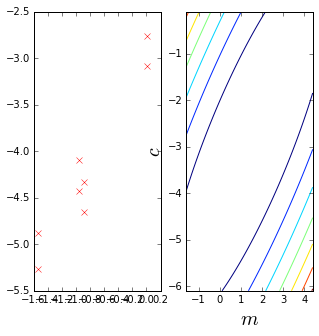

In [30]:
x = np.random.normal(size=4)

m_true = 1.4
c_true = -3.1

y = m_true*x+c_true

f, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].plot(x, y, 'rx') # plot data as red crosses

noise = np.random.normal(scale=0.5, size=4) # standard deviation of the noise is 0.5
y = m_true*x + c_true + noise
ax[0].plot(x, y, 'rx')

m_vals = np.linspace(m_true-3, m_true+3, 100) # create an array of linearly separated values around m_true
c_vals = np.linspace(c_true-3, c_true+3, 100) # create an array of linearly separated values around c_true

m_grid, c_grid = np.meshgrid(m_vals, c_vals) 
# we can see that this is now a 100x100 matrix of values with the print command
print("The dimensionality of m_grid is", m_grid.shape)

E_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        E_grid[i, j] = ((y - m_grid[i, j]*x - c_grid[i, j])**2).sum()

ax[1].contour(m_vals, c_vals, E_grid)
ax[1].set_xlabel('$m$', fontsize=20)
ax[1].set_ylabel('$c$', fontsize=20)

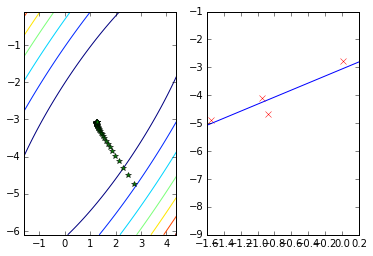

KeyboardInterrupt: 

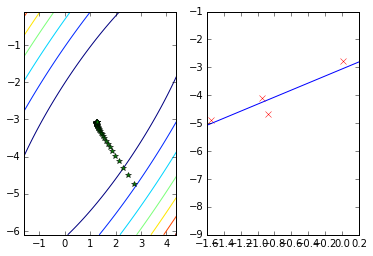

In [32]:
m_star = 3.0
c_star = -5.0

c_grad = -2*(y-m_star*x - c_star).sum()
print("Gradient with respect to c is ", c_grad)

m_grad = -2*(x*(y-m_star*x - c_star)).sum()
print("Gradient with respect to m is ", m_grad)

print("Original m was ", m_star, " and original c was ", c_star)
learn_rate = 0.01
c_star = c_star - learn_rate*c_grad
m_star = m_star - learn_rate*m_grad
print("New m is ", m_star, " and new c is ", c_star)


# first let's plot the error surface
f, (ax1, ax2) = plt.subplots(1, 2) # this is to create 'side by side axes'
ax1.contour(m_vals, c_vals, E_grid) # this makes the contour plot on axes 1.
plt.xlabel('$m$')
plt.ylabel('$c$')
m_star = 3.0
c_star = -5.0
for i in range(100): # do 100 iterations (parameter updates)
    # compute the gradients
    c_grad = -2*(y-m_star*x - c_star).sum()
    m_grad = -2*(x*(y-m_star*x - c_star)).sum()
    
    # update the parameters
    m_star = m_star - learn_rate*m_grad
    c_star = c_star - learn_rate*c_grad
    
    # update the location of our current best guess on the contour plot
    ax1.plot(m_star, c_star, 'g*')
    
    # show the current status on the plot of the data
    ax2.plot(x, y, 'rx')
    plt.ylim((-9, -1)) # set the y limits of the plot fixed
    x_plot = np.asarray(plt.xlim()) # get the x limits of the plot for plotting the current best line fit.
    y_plot = m_star*x_plot + c_star
    ax2.plot(x_plot, y_plot, 'b-')
    display(plt.gcf())
    time.sleep(0.25) # pause between iterations to see update
    ax2.cla()
    clear_output()

# choose a random point for the update
i = np.random.randint(x.shape[0]-1)
# update m
m_star = m_star + 2*learn_rate*(x[i]*(y[i]-m_star*x[i] - c_star))
# update c
c_star = c_star + 2*learn_rate*(y[i]-m_star*x[i] - c_star)

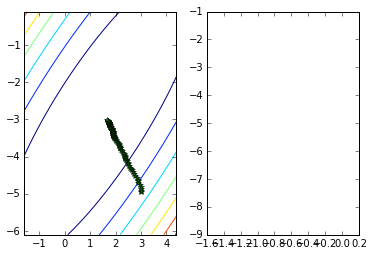

In [34]:
# first let's plot the error surface
f, (ax1, ax2) = plt.subplots(1, 2) # this is to create 'side by side axes'
ax1.contour(m_vals, c_vals, E_grid) # this makes the contour plot on axes 1.
plt.xlabel('$m$')
plt.ylabel('$c$')
m_star = 3.0
c_star = -5.0
for i in range(100): # do 100 iterations (parameter updates)
    # choose a random point
    i = np.random.randint(x.shape[0]-1)

    # update m
    m_star = m_star + 2*learn_rate*(x[i]*(y[i]-m_star*x[i] - c_star))
    # update c
    c_star = c_star + 2*learn_rate*(y[i]-m_star*x[i] - c_star)# compute the gradients
    
    # update the location of our current best guess on the contour plot
    ax1.plot(m_star, c_star, 'g*')
    
    # show the current status on the plot of the data
    ax2.plot(x, y, 'rx')
    plt.ylim((-9, -1)) # set the y limits of the plot fixed
    x_plot = np.asarray(plt.xlim()) # get the x limits of the plot for plotting the current best line fit.
    y_plot = m_star*x_plot + c_star
    ax2.plot(x_plot, y_plot, 'b-')
    display(plt.gcf())
    time.sleep(0.25)  # pause between iterations to see update
    ax2.cla()
    clear_output()

In [ ]:
Linear regression diagrams 1 to 70

In [36]:
import pods
pods.notebook.code_toggle()

### Basis Functions

#### Nonlinear Regression

-   Problem with Linear Regression—$\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$


Note that we get a quadratic form, with the minimum at the same point that the maximum was at for the probability density. This is the essence of the idea that minimizing the error with respect to a paramter is the same as maximizing the probability with respect to the parameter (although normally we call it maximum likelihood, not maximum probability). 

### Classification

- In classification we take in a *feature matrix* and make predictions of class labels given the features. 
- A model for classification
    - predict the class label, $y_i$, given the features associated with that data point, $\mathbf{x}_i$, using the following formula: 

    $$y_i = \text{sign}\left(\mathbf{w}^\top \mathbf{x}_i + b\right)$$

    - Implies that the decision boundary for the classification is given by a *hyperplane*. 
    - Vector $\mathbf{w}$ is the normal vector to the hyperplane (<http://en.wikipedia.org/wiki/Normal_(geometry)>).
    - Hyperplane is described by the formula $\mathbf{w}^\top \mathbf{x} = -b$ 

### Toy Data

In [29]:
# let's sample first from the positive class. To separate 
# it from the negative, we'll add 1.5 to the samples.
x_plus = np.random.normal(loc=1.5, size=(50, 2))
# And now the negative class, to separate from the positive
# we subtract 1.5 from the samples
x_minus = np.random.normal(loc=-1.5, size=(50, 2))

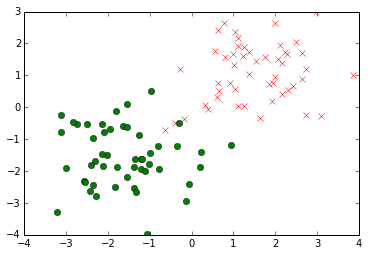

In [30]:
# now let's plot our data. We'll make the
# positive class red crosses and the negative
# class green circles
plt.plot(x_plus[:, 0], x_plus[:, 1], 'rx')
plt.plot(x_minus[:, 0], x_minus[:, 1], 'go')

### Drawing Decision Boundary

 - Refresher: to draw a hyper plane at decision boundary.
 - Decision boundary defined as the point at which a data point moves from being classified as -1 to being classified as +1. 
 - For a prediction $\text{sign}(\mathbf{x}^\top \mathbf{w})$, using the definition of the inner product

   $$\text{sign}(w_0 + w_1x_{i,1} + w_2 x_{i, 2})$$

 - $x_{i, 1}$ is the first feature from the $i$th data point, $x_{i, 2}$ is the second feature.
 - Here we are using the trick that includes an extra $x_{0,i}=1$ to account for the bias. 
 - So if we think of $w_0 = b$ we have

   $$\text{sign}\left(b + w_1 x_{i, 1} + w_2 x_{i, 2}\right)$$

   
### Drawing Decision Boundary

The decision boundary is where the output of the function changes from -1 to +1 (or vice versa) so it's the point at which the argument of the $\text{sign}$ function is zero. So in other words, the decision boundary is given by the *line* defined by $x_1 w_1 + x_2 w_2 = -b$ (where we have dropped the index $i$ for convenience). In this two dimensional space the decision boundary is defined by a line. In a three dimensional space it would be defined by a *plane*  and in higher dimensional spaces it is defined by something called a *hyperplane* (http://en.wikipedia.org/wiki/Hyperplane). This equation is therefore often known as the *separating hyperplane* because it defines the hyperplane that separates the data. To draw it in 2-D we can choose some values to plot from $x_1$ and then find the corresponding values for $x_2$ to plot using the rearrangement of the hyperplane formula as follows

$$x_2 = -\frac{(b+x_1w_1)}{w_2}$$

Of course, we can also choose to specify the values for $x_2$ and compute the values for $x_1$ given the values for $x_2$,

$$x_1 = -\frac{b + x_2w_2}{w_1}$$

It turns out that sometimes we need to use the first formula, and sometimes we need to use the second. Which formula we use depends on how the separating hyperplane leaves the plot. 

We want to draw the separating hyperplane in the bounds of the plot which is showing our data. To think about which equation to use, let's consider two separate situations (actually there are a few more). 

1. If the separating hyperplane leaves the top and bottom of the plot then we want to plot a line with values in the $y$ direction (given by $x_2$) given by the upper and lower limits of our plot. The values in the $x$ direction can then be computed from the formula for the plane. 

2. Conversely if the line leaves the sides of the plot then we want to plot a line with values in the $x$ direction given by the limits of the plot. Then the values in the $y$ direction can be computed from the formula. Whether the line leaves the top/bottom or the sides of the plot is dependent on the relative values of $w_1$ and $w_2$. 

This motivates a simple `if` statement to check which situation we're in.

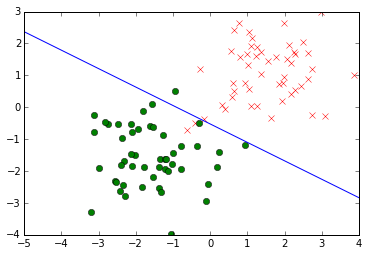

In [33]:
# Compute coordinates for the separating hyperplane
plot_limits = np.asarray([-5, 4])
if abs(w[1])>abs(w[0]):
    # If w[1]>[w[0] in absolute value, plane is likely to be leaving tops of plot.
    x0 = plot_limits
    x1 = -(b + x0*w[0])/w[1]
else:
    # otherwise plane is likely to be leaving sides of plot.
    x1 = plot_limits
    x0 = -(b + x1*w[1])/w[0]

# Plot the data again
plt.plot(x_plus[:, 0], x_plus[:, 1], 'rx')
plt.plot(x_minus[:, 0], x_minus[:, 1], 'go')
# plot a line to represent the separating 'hyperplane'
plt.plot(x0, x1, 'b-')

In [ ]:
### Code for Decision Boundary Drawing

In [34]:
def hyperplane_coordinates(w, b, plot_limits):
    
    if abs(w[1])>abs(w[0]):
        # If w[1]>w[0] in absolute value, plane is likely to be leaving tops of plot.
        x0 = plot_limits
        x1 = -(b + x0*w[0])/w[1]
    else:
        # otherwise plane is likely to be leaving sides of plot.
        x1 = plot_limits
        x0 = -(b + x1*w[1])/w[0]
    return x0, x1

This little drawing routine we've defined is going to be useful for updating the hyperplane when we update the parameters (to visualize how things change). We don't want paste in the code *every* time we need it, so let's define it as a function which computes the coordinates of the hyperplane. To define a function we declare it as follows:

### Perceptron Algorithm

Now we have the `for` loop and some Python basics, let's see how the perceptron algorithm looks in python. First of all, we will create a data set to play with. We'll do this by sampling from a Gaussian.

Now the perceptron algorithm. The way we taught it in class, the first step involves initializing the the weight vector (which remember is *normal* to the decision boundary) with a data point. First we decide which data point to use, positive or negative, then we set the normal vector to be equal to that point multiplied by the class label

$$\mathbf{w} = y_i \mathbf{x}_i$$

As we saw in class, the predicted label of the $i$th point is given by

$$\text{sign}(\mathbf{w}^\top\mathbf{x}_i)$$

So setting the inital vector to $y_i\mathbf{x}_i$ means that the $i$th point's prediction will be given by

$$\text{sign}(\mathbf{w}^\top\mathbf{x}_i) = \text{sign}(y_i\mathbf{x}_i^\top \mathbf{x}_i)$$

Because $\mathbf{x}_i^\top \mathbf{x}_i$ is the inner product between a vector and itself, it is always positive, so the sign of the argument will be determined only by the sign of $y_i$. So setting the inital vector to this value ensures that the $i$th data point is correctly classified. Let's see the code now for doing this.

In [31]:
# flip a coin (i.e. generate a random number and check if it is greater than 0.5)
choose_plus = np.random.rand(1)>0.5
if choose_plus:
    # generate a random point from the positives
    index = np.random.randint(0, x_plus.shape[1])
    w = x_plus[index, :] # set the normal vector to that point.
    b = 1
else:
    # generate a random point from the negatives
    index = np.random.randint(0, x_minus.shape[1])
    w = -x_minus[index, :] # set the normal vector to minus that point.
    b = -1

### Perceptron Algorithm

Right, we are now almost ready to write some code that initializes the first value of the weight vector and draws the associated hyperplane.  The final component we need is the perceptron weight update. For the perceptron algorithm, the next step is to test the weights we have. We can select a data point at random, and test to see if it is classified correctly. If it is classified correctly, we do nothing. However, if it isn't we need to try and change the weight vector to make the data point classified correctly. We already know that if the weight vector is set to $\mathbf{w} = y_i \mathbf{x}_i$ then the $i$th data point will be correctly classified, but that's no good, because it means forgetting everything we've learnt so far. Instead, we choose to move the weight vector by adding some portion of $y_i \mathbf{x}_i$ to $\mathbf{w}$, 

$$\mathbf{w}_\text{new} \leftarrow \mathbf{w}_\text{old} + \eta y_i \mathbf{x}_i$$

so that the new classification is given by 

$$\text{sign}(\mathbf{w}_\text{old}^\top\mathbf{x}_i + \eta y_i \mathbf{x}_i^\top\mathbf{x}_i)$$ 

So in other words, because $\mathbf{x}_i^\top\mathbf{x}_i$ is positive, then the argument of $\text{sign}()$ will be adapted in the direction of $y_i$. I.e. the weight vector is pulled in a direction which makes the data vector $\mathbf{x}_i$ more likely to be classified correctly. In fact, if $\eta$ is large enough then $\mathbf{x}_i$ is guaranteed to be correctly classified. 

Let's put it all together. To animate the drawing in the jupyter notebook, we need two further modules: `time` which will allow us to pause the algorithm for updating the hyperplane drawing and `IPython.display.clear_output` which will allow us to clear the plot between updates.

In [ ]:
# import the time model to allow python to pause.
import time
# import the IPython display module to clear the output.
from IPython.display import display, clear_output

Now let's add two helper functions for displaying results. `init_plot()` is used for setting up the plots initially while `update_plots()` is there for refreshing the plots.

In [127]:
# Helper function for displaying results
def init_plots():
    # Helper function to initialise plots
    f, ax = plt.subplots(1, 2,figsize=(14,7))
    hselect, = ax[0].plot(x_select[0], x_select[1], 'ro', markersize=10)
    ax[0].plot(x_plus[:, 0], x_plus[:, 1], 'rx')
    ax[0].plot(x_minus[:, 0], x_minus[:, 1], 'go')
    ax[0].set_xlabel('$x_0$', fontsize=15)
    ax[0].set_ylabel('$x_1$', fontsize=15)
    hiter = ax[0].set_title('Iteration 0')
    # plot a line to represent the separating 'hyperplane'
    x0, x1 = hyperplane_coordinates(w, b, np.asarray([-5, 4]))
    hplane, = ax[0].plot(x0, x1, 'b-')
    
    hmsg = ax[1].text(0.5,0.5,' ', horizontalalignment='center', fontsize=20)
    ax[1].set_axis_off()

    clear_output(wait=True)
    display(f)
    time.sleep(1.0)
    return f, ax, hplane, hselect, hmsg, hiter

def update_plots(f, ax, hplane, hselect, hmsg, hiter, i, w, b, x_select):  
    # Helper function for updating plots
    hselect.set_xdata(x_select[0])
    hselect.set_ydata(x_select[1])
    clear_output(wait=True)
    display(f)
    if i<3:
        time.sleep(0.5)
    else:
        time.sleep(.25)        
    # Re-plot the hyper plane     
    x0, x1 = hyperplane_coordinates(w, b, np.asarray([-5, 4]))
    hplane.set_xdata(x0)
    hplane.set_ydata(x1)
    hiter.set_text('Iteration ' + str(i))
    hmsg.set_text('')
    clear_output(wait=True)
    display(f)
    if i<3:
        time.sleep(0.5)
    else:
        time.sleep(.25)        

### Code for Perceptron 

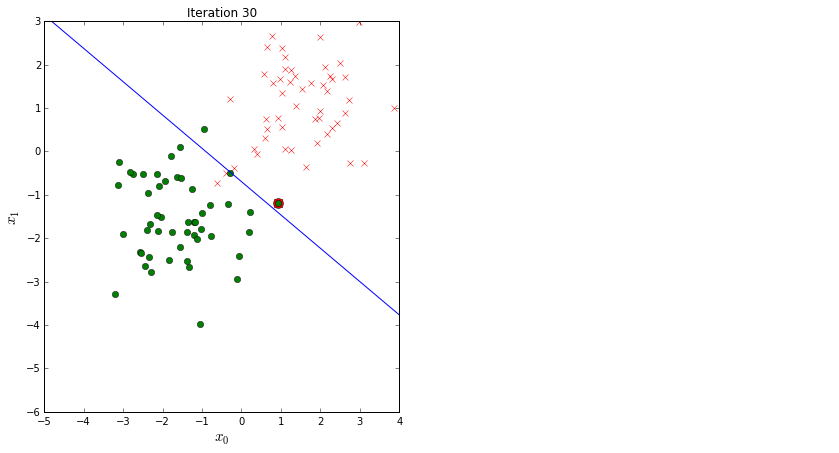

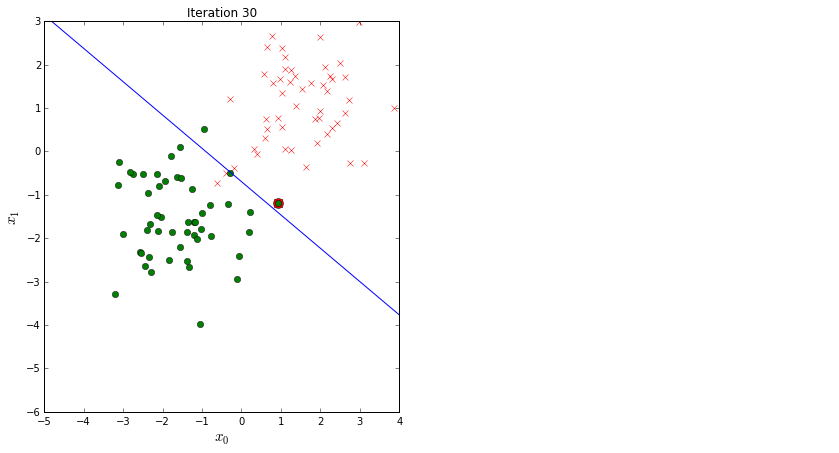

In [128]:
learn_rate = 0.1
num_iterations = 30
i = 0
setup=True

while i < num_iterations:
    w_updated = False
    # select a point at random from the data
    choose_plus = np.random.uniform(size=1)>0.5
    if choose_plus:
        # choose a point from the positive data
        index = np.random.random_integers(x_plus.shape[0]-1)
        x_select = x_plus[index, :]
        if not np.sign(np.dot(w, x_plus[index, :])+b) == 1:
            # point is currently incorrectly classified
            w = w + learn_rate*x_plus[index, :]
            b = b + learn_rate
            w_updated = True
    else:
        # choose a point from the negative data
        index = np.random.random_integers(x_minus.shape[0]-1)
        x_select = x_minus[index, :]
        if not np.sign(np.dot(w, x_minus[index, :])+b) == -1:
            # point is currently incorrectly classified
            w = w - learn_rate*x_minus[index, :]
            b = b - learn_rate
            w_updated = True

    if setup:
        # First iteration. Set up plots.
        f, ax, hplane, hselect, hmsg, hiter = init_plots()
        setup = False
    if w_updated: 
        i += 1
        update_plots(f, ax, hplane, hselect, hmsg, hiter, i, w, b, x_select)

### Perceptron Reflection

 - The perceptron is an algorithm. 
 - What is it doing? When will it fail?
 - We can explain the update equations and proove it converges.
 - Normally it is far easier to first define an *objective function*.
 

### Objective Function and Regression

Classification is about mapping an input point to a class label which is either positive or negative. Regression is mapping an input point to a real value. One example of a *model* for regression is a linear regression involving a slope and an intercept.

$$y_i = mx_i + c$$

We now need an *algorithm* to fit this model. We are going to use regression to introduce the idea of an error function. The error function is an objective function that we *minimize* to fit our model. One commonly used error function for regression is least squares. The idea in least squares is to minimize the sum of squared differences between our prediction and the observed data. We can write our error function in the following form

$$E(m, c) = \sum_{i=1}^n (y_i - mx_i - c)^2$$

Let's create an artifical data set and plot what the contours of this error function look like in python. Artificial data sets are a really useful way to understand a model. By creating an artifical data set that is sampled from the model, we are forced to think about the type of data we are expecting. To create an artificial data set we first sample some inputs, let's sample 4 points. 

In [45]:
x = np.random.normal(size=4)

We now need to decide on a *true* value for $m$ and a *true* value for *c* to use for generating the data. 

In [46]:
m_true = 1.4
c_true = -3.1

We can use these values to create our artificial data. The formula $y_i = mx_i + c$ is translated to code as follows:

In [47]:
y = m_true*x+c_true

We can now plot the artifical data we've created.

(-3, 3)

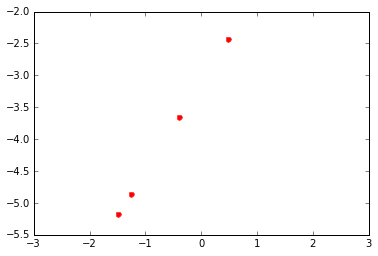

In [48]:
plt.plot(x, y, 'r.', markersize=10) # plot data as red dots
plt.xlim([-3, 3])

These points lie exactly on a straight line, that's not very realistic, let's corrupt them with a bit of Gaussian 'noise'.

(-3, 3)

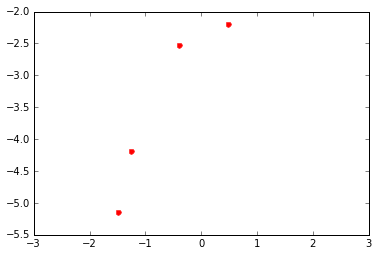

In [49]:
noise = np.random.normal(scale=0.5, size=4) # standard deviation of the noise is 0.5
y = m_true*x + c_true + noise
plt.plot(x, y, 'r.', markersize=10)
plt.xlim([-3, 3])

### Contour Plot of Error Function

Now we are going to do something a little bit complicated. We are going to compute the error function for a grid of different values for $m$ and $c$. Doing this will help us visualize the shape of the error function. What we need is to compute a grid of all different values of $m$ and $c$ which we think are sensible. Since we know the true values, let's centre our grid around these. In python, a special command is provided for making the grid. First of all, we use the `linspace` command for creating an array of linearly spaced values of $m$ and $c$, then we use `meshgrid` to create a grid from those two vectors.

In [50]:
m_vals = np.linspace(m_true-3, m_true+3, 100) # create an array of linearly separated values around m_true
c_vals = np.linspace(c_true-3, c_true+3, 100) # create an array of linearly separated values around c_true

Now we create the grid on which to compute the error function. `meshgrid` creates a matrix of values that form the grid, for both $c$ and $m$. 

In [51]:
m_grid, c_grid = np.meshgrid(m_vals, c_vals) 
# we can see that this is now a 100x100 matrix of values with the print command
print("The dimensionality of m_grid is", m_grid.shape)

The dimensionality of m_grid is (100, 100)


Now we compute the error function at each of those combinations of $c$ and $m$.


In [52]:
E_grid = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        E_grid[i, j] = ((y - m_grid[i, j]*x - c_grid[i, j])**2).sum()

This loop computes the error function for each value in `m_grid` and `c_grid`, storing the result in `E_grid`. This allows us to make a contour function plot of the error. We can do this using the `matplotlib` module and the command `contour`. 

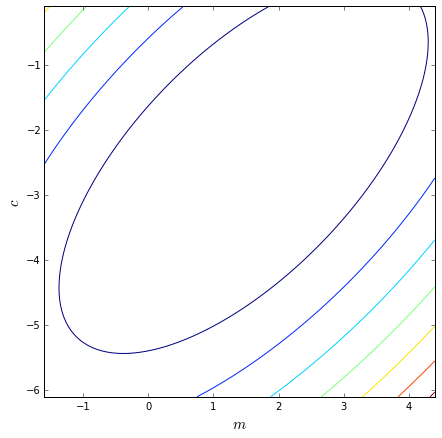

In [56]:
f, ax = plt.subplots(figsize=(7,7))
ax.contour(m_vals, c_vals, E_grid)
ax.set_xlabel('$m$', fontsize=15)
ax.set_ylabel('$c$', fontsize=15)

### Steepest Descent

- Minimize the sum of squares error function. 
- One way of doing that is gradient descent. 
- Initialize with a guess for $m$ and $c$ 
- update that guess by subtracting a portion of the gradient from the guess. 
- Like walking down a hill in the steepest direction of the hill to get to the bottom.

So let's start with a guess for $m$ and $c$.

In [57]:
m_star = 3.0
c_star = -5.0

### Offset Gradient

Now we need to compute the gradient of the error function, firstly with respect to $c$,

$$\frac{\text{d}E(m, c)}{\text{d} c} = -2\sum_{i=1}^n (y_i - mx_i - c)$$

We'll review how this gradient is derived in a moment, but first let's just see how it's computed in numpy.

In [64]:
c_grad = -2*(y-m_star*x - c_star).sum()
print("Gradient with respect to c is ", c_grad)

Gradient with respect to c is  -10.7568772114


To see how the gradient was derived, first note that the $c$ appears in every term in the sum. So we are just differentiating $(y_i - mx_i - c)^2$ for each term in the sum. The gradient of this term with respect to $c$ is simply the gradient of the outer quadratic, multiplied by the gradient with respect to $c$ of the part inside the quadratic. The gradient of a quadratic is two times the argument of the quadratic, and the gradient of the inside linear term is just minus one. This is true for all terms in the sum, so we are left with the sum in the gradient. 

### Slope Gradient

The gradient with respect tom $m$ is similar, but now the gradient of the quadratic's argument is $-x_i$ so the gradient with respect to $m$ is

$$\frac{\text{d}E(m, c)}{\text{d} m} = -2\sum_{i=1}^n x_i(y_i - mx_i - c)$$

which can be implemented in python (numpy) as

In [65]:
m_grad = -2*(x*(y-m_star*x - c_star)).sum()
print("Gradient with respect to m is ", m_grad)

Gradient with respect to m is  -0.73337746458


### Update Equations


This gives us the gradients with respect to $m$ and $c$. We can now update our inital guesses for $m$ and $c$ using the gradient. However, we don't want to just add the gradient to $m$ and $c$, we need to take a *small* step in the gradient direction, otherwise we might overshoot the minimum. We want to follow the gradient to get to the minimum, and the gradient changes all the time. The step size has already been introduced, it's again known as the learning rate and is denoted by $\eta$. 

$$c_\text{new} \leftarrow c_{\text{old}} - \eta \frac{\text{d}E(m, c)}{\text{d}c}$$ 

gives us an update for our estimate of $c$ (which in the code we've been calling `c_star` to represent a common way of writing a parameter estimate, $c^*$) and 

$$m_\text{new} \leftarrow m_{\text{old}} - \eta \frac{\text{d}E(m, c)}{\text{d}m}$$

gives us an update for our estimate of $m$. These two udpates can be coded as

In [66]:
print("Original m was", m_star, "and original c was", c_star)
learn_rate = 0.01
c_star = c_star - learn_rate*c_grad
m_star = m_star - learn_rate*m_grad
print("New m is", m_star, "and new c is", c_star)


Original m was  3.0  and original c was  -5.0
New m is  3.00733377465  and new c is  -4.89243122789


Of course, to fit the model we need to keep computing the gradients (they change as we change $m$ and $c$) and keep doing the parameter updates. Let's watch a gradient descent in action with the following code.

In [ ]:
# first let's plot the error surface
f, ax = plt.subplots(1, 2, figsize=(14,7)) # this is to create 'side by side axes'
levels=[0, 0.5, 1, 2, 4, 8, 16, 32, 64]
hcont = ax[0].contour(m_vals, c_vals, E_grid, levels=levels) # this makes the contour plot on axes 0.
plt.clabel(hcont, inline=1, fontsize=15)
ax[0].set_xlabel('$m$', fontsize=15)
ax[0].set_ylabel('$c$', fontsize=15)
ax[0].set_title('Error Function', fontsize=20)
m_star = 3.0
c_star = -5.0

# Set up plot
hdata, = ax[1].plot(x, y, 'r.', markersize=10)
ax[1].set_xlabel('$x$', fontsize=15)
ax[1].set_ylabel('$y$', fontsize=15)
ax[1].set_ylim((-9, -1)) # set the y limits of the plot fixed
ax[1].set_title('Best Fit', fontsize=20)

# Plot the current estimate of the best fit line
x_plot = np.asarray(ax[1].get_xlim()) # get the x limits of the plot for plotting the current best line fit.
y_plot = m_star*x_plot + c_star
hfit, = ax[1].plot(x_plot, y_plot, 'b-', linewidth=3)

### Gradient Descent Algorithm

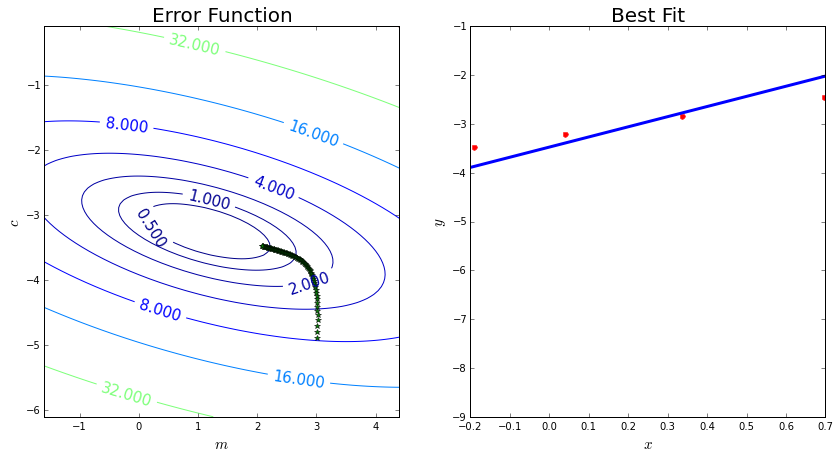

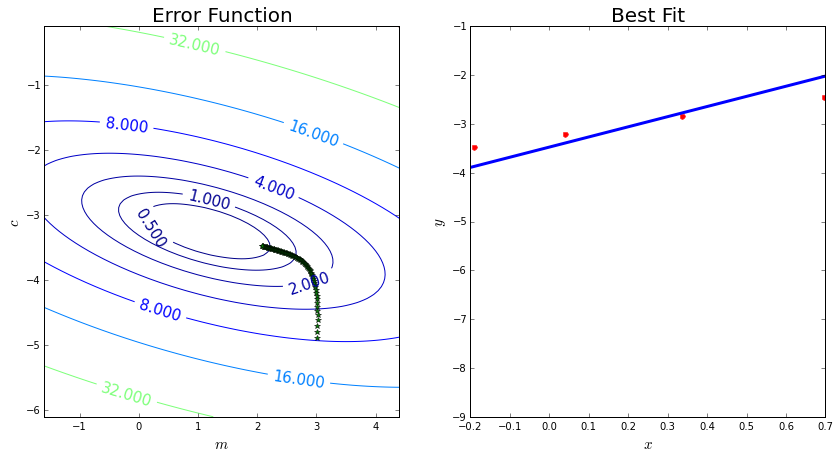

In [79]:
for i in range(100): # do 100 iterations (parameter updates)
    # compute the gradients
    c_grad = -2*(y-m_star*x - c_star).sum()
    m_grad = -2*(x*(y-m_star*x - c_star)).sum()
    
    # update the parameters
    m_star = m_star - learn_rate*m_grad
    c_star = c_star - learn_rate*c_grad
    
    # update the location of our current best guess on the contour plot
    ax[0].plot(m_star, c_star, 'g*')
    y_plot = m_star*x_plot + c_star
    
    # show the current status on the plot of the data
    hfit.set_ydata(y_plot)
    clear_output(wait=True)
    display(f)
    time.sleep(0.25) # pause between iterations to see update

### Stochastic Gradient Descent

This approach of steepest gradient descent works fine if the number of data points, $n$ isn't too large. But what do Google do when they have 1 billion data points? We can get an algorithm that is a bit more similar to the perceptron (it looks at one data point at a time rather than summing across *all* data points) by using *stochastic* gradient descent. In this case, instead of computing the true gradient of $E(m, c)$ we just look at one term from the full sum over $n$. The real gradient with respect to $m$ is given by 

$$\frac{\text{d}E(m, c)}{\text{d} m} = -2\sum_{i=1}^n x_i(y_i - mx_i - c)$$

but it has $n$ terms in the sum. Substituting in the gradient we can see that the full update is of the form

$$m_\text{new} \leftarrow m_\text{old} + 2\eta \left[x_1 (y_1 - m_\text{old}x_1 - c_\text{old}) + (x_2 (y_2 - m_\text{old}x_2 - c_\text{old}) + \dots + (x_n (y_n - m_\text{old}x_n - c_\text{old})\right]$$

This could be split up into lots of individual updates

$$m_1 \leftarrow m_\text{old} + 2\eta \left[x_1 (y_1 - m_\text{old}x_1 - c_\text{old})\right]$$
$$m_2 \leftarrow m_1 + 2\eta \left[x_2 (y_2 - m_\text{old}x_2 - c_\text{old})\right]$$
$$m_3 \leftarrow m_2 + 2\eta \left[\dots\right]$$
$$m_n \leftarrow m_{n-1} + 2\eta \left[x_n (y_n - m_\text{old}x_n - c_\text{old})\right]$$

which would lead to the same final update, but note that we aren't changing the $m$ and $c$ we use for computing the gradient term at each update. In stochastic gradient descent we *do* update $m$ and $c$ we use. This means that we aren't quite following the steepest gradient, but a stochastic approximation to the gradient. However, it also means we can just present each data point in a random order, like we did for the perceptron. This makes the algorithm suitable for large scale web use (recently this domain is know as 'Big Data') and algorithms like this are widely used by Google, Microsoft, Yahoo! and Facebook.

$$m_1 \leftarrow m_\text{old} + 2\eta \left[x_1 (y_1 - m_\text{old}x_1 - c_\text{old})\right]$$
$$m_2 \leftarrow m_1 + 2\eta \left[x_2 (y_2 - m_1x_2 - c_1)\right]$$
$$m_3 \leftarrow m_2 + 2\eta \left[\dots\right]$$
$$m_n \leftarrow m_{n-1} + 2\eta \left[x_n (y_n - m_{n - 1}x_n - c_{n-1})\right]$$

Or more accurate, since the data is normally presented in a random order we just can write

$$m_\text{new} = m_\text{old} + 2\eta\left[x_i (y_i - m_\text{old}x_i - c_\text{old})\right]$$

which is easily implemented as code 

In [80]:
# choose a random point for the update
i = np.random.randint(x.shape[0]-1)
# update m
m_star = m_star + 2*learn_rate*(x[i]*(y[i]-m_star*x[i] - c_star))
# update c
c_star = c_star + 2*learn_rate*(y[i]-m_star*x[i] - c_star)

Putting it all together in an algorithm, we can do stochastic gradient descent for our regression data.

In [ ]:
# first let's plot the error surface
f, ax = plt.subplots(1, 2, figsize=(14, 7)) # this is to create 'side by side axes'
hcont = ax[0].contour(m_vals, c_vals, E_grid, levels=levels) # this makes the contour plot on axes 1.
plt.clabel(hcont, inline=1, fontsize=15)
ax[0].set_xlabel('$m$', fontsize=15)
ax[0].set_ylabel('$c$', fontsize=15)
ax[0].set_title('Error Function', fontsize=20)

### Stochastic Gradient Descent

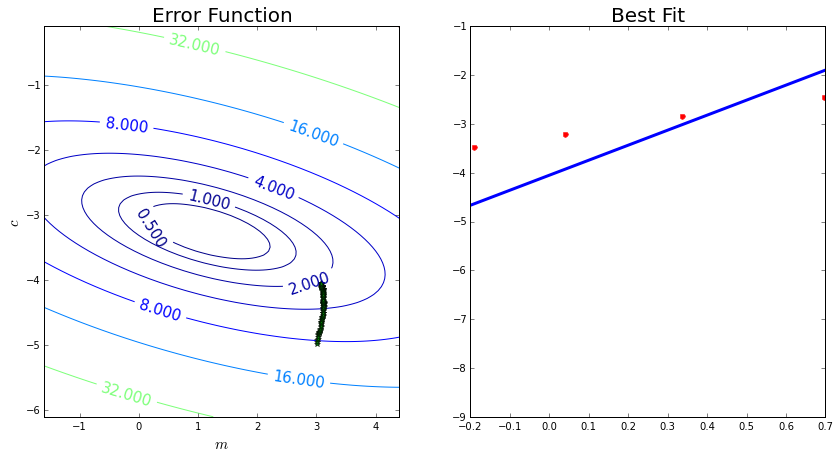

In [84]:
m_star = 3.0
c_star = -5.0

# show the current status on the plot of the data
ax[1].plot(x, y, 'r.',markersize=10)
ax[1].set_ylim((-9, -1)) # set the y limits of the plot fixed
x_plot = np.asarray(ax[1].get_xlim()) # get the x limits of the plot for plotting the current best line fit.
y_plot = m_star*x_plot + c_star
hfit, = ax[1].plot(x_plot, y_plot, 'b-',linewidth=3)
ax[1].set_title('Best Fit', fontsize=20)

for i in range(100): # do 100 iterations (parameter updates)
    # choose a random point
    i = np.random.randint(x.shape[0]-1)

    # update m
    m_star = m_star + 2*learn_rate*(x[i]*(y[i]-m_star*x[i] - c_star))
    # update c
    c_star = c_star + 2*learn_rate*(y[i]-m_star*x[i] - c_star)
    
    # update the location of our current best guess on the contour plot
    ax[0].plot(m_star, c_star, 'g*')
    
    y_plot = m_star*x_plot + c_star
    hfit.set_ydata(y_plot)
    display(f)
    time.sleep(0.25)  # pause between iterations to see update
    clear_output(wait=True)

#### Reflection on Linear Regression and Supervised Learning

1. *Easy* What effect does the learning rate have in the optimization? What's the effect of making it too small, what's the effect of making it too big? Do you get the same result for both stochastic and steepest gradient descent?

2. *Harder* The stochastic gradient descent doesn't help very much for such a small data set. It might be fun to try it with more than 4 data points. Can you modify the code above to run with thousands of data points? Do you also need to change the number of iterations? Which code base is faster? Does it make sense to summarize both algorithms in terms of the number of iterations?

3. *Very Hard* Can you use what you've learnt to come up with a batch algorithm for the perceptron? We justified the perceptron by geometric arguments to construct the algorithm. Does it have an error function associated with it? What is the error function? Is the perceptron doing gradient descent on this error function?

### Nonlinear Regression with Basis Functions

In the lectures, we also looked at the idea of doing non linear regression with the same algorithms. The way we chose to do this was to introduce the concept of a basis function. A basis function is a feature space that is computed from our original data. A very common one is a polynomial basis, for example a quadratic basis. In a quadratic basis we assume our regression is given by

$$y_i = w_2 x_i^2 + w_1 x_i + w_0.$$

This gives a *nonlinear* relationship between our observation and the inputs. Here the basis vector is given by $\boldsymbol{\phi} = \left[1\ x_i\ x_i^2\right]$. Although the set up is non-linear we can still use the same type of algorithm we used above. For convenience we have replace $c$ with $w_0$, $m$ with $w_1$ and we have added $w_2$ as the coefficient associated with the quadratic term. This approach to making linear algorithms nonlinear is very common, all sorts of different nonlinearities can be used (not just polynomials). The algorithms stay quite simple as long as they remain *linear* in the parameters. Here *linear* in the parameters means that the parameters can only appear in multiplications and sums, not inside *nonlinear* functions (like the basis functions). In other words they need to be writable as

$$y_i = w_3 \phi_3 + w_2 \phi_2 + w_1 \phi_1 + w_0 \phi_0.$$

This is what makes linear algebra so important (we've already seen the importance of differential calculus in finding a minimum!). Linear algebra gives us a short-cut to writing down functions like the one above, and makes algorithm derivation with such models much easier. For example, I would always write such an model down as an *inner product*,

$$y_i = \mathbf{w}^\top \boldsymbol{\phi}$$

which is a much more compact form. Here I've written the inner product in the matrix notation. This tuns out to be necessary to use when we are using more advanced methods to design algorithms to fit the models described above. We need to use linear algebra (i.e. matrices, determinants, inverses etc.) and *multivariate calculus*.

### Unsupervised Learning

The examples of *regression* and *classification* assume that we are given some data, $\mathbf{x}_i$ and some associated labels for the data $y_i$. Whether we use regression or classification is dependent on whether the label information is discrete (like in classifying whether someone is a friend of yours on Facebook) or whether the label information is continuous (like predicting the demand for bandwidth you might have on a particular day). Because there are labels present, these two examples of learning are both known as *supervised learning*. Another type of learning you might be interested in is when there are no labels present. That is known as *unsupervised learning*. Broadly speaking there are two types of unsupervised learning. Firstly, when you are looking to automatically categorize your data into different groups (like political parties, or types of animal: mammal, reptile, bird etc). This is known as clustering or in some contexts vector quantisation (we will refer to it as clustering). It is the unsupervised equivalent of classification. 

### Clustering

We will look at one clustering algorithm: $k$-means clustering. In $k$-means clustering the idea is to come up with a representative 'centre' associated with each of the clusters. This is the *mean* of the cluster. Points are allocated to that cluster centre if they are closer to that cluster centre than any of the other cluster centres. To start the algorithm, you first need a number of centres (these might be chosen randomly from the data). You then allocate each data point to the centre it's closest too. Then you update the values for each centre by setting it to the mean of the points that are allocated to it. To illustrate this in practice, we will first create a data set containing three clusters that we'll create by sampling from Gaussian densities. 

### Reading